In [30]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt

In [31]:
withoutw = pd.read_excel('train_and_test_accuracies_without_weights.xlsx', index_col=0)
withw = pd.read_excel('train_and_test_accuracies_with_weights.xlsx', index_col=0)

In [32]:
withoutw.head(3)

,train_loss_without_weights,train_acc_without_weights,test_acc_without_weights,Difference
epoch,,,,
1,3.402711,0.272641,0.705701,-0.433059
2,0.892642,0.775281,0.910689,-0.135408
3,0.301483,0.929047,0.945131,-0.016084


In [33]:
withw.head(3)

,loss_with_weights,train_acc_with_weights,test_acc_with_weights,Difference
epoch,,,,
1,11.268594,0.046443,0.052969,-0.006526
2,9.352086,0.065801,0.055740,0.010061
3,7.990805,0.230126,0.378781,-0.148655


In [34]:
print(withoutw.shape)
print(withw.shape)

(30, 4)
(30, 4)


### Plot accuracies

#### Create a df to plot loss values

In [35]:
# Initialize an empty df
final = pd.DataFrame()

In [36]:
# List the columns the df will have
final_columns = ['Train Acc With', 'Train Acc Without', 'Train Loss With', 'Train Loss Without', 'Test Acc With', 'Test Acc Without']

In [37]:
# Create the columns
for column in final_columns:
    final[column] = None

In [38]:
# Confirm they were correctly created
final

,Train Acc With,Train Acc Without,Train Loss With,Train Loss Without,Test Acc With,Test Acc Without


In [39]:
# Add training accuracy values
final['Train Acc With'] = withw['train_acc_with_weights']
final['Train Acc Without'] = withoutw['train_acc_without_weights']

# Add loss values
final['Train Loss With'] = withw['loss_with_weights']
final['Train Loss Without'] = withoutw['train_loss_without_weights']

# Add val accuracy values
final['Test Acc With'] = withw['test_acc_with_weights']
final['Test Acc Without'] = withoutw['test_acc_without_weights']

In [40]:
final.head(5)

,Train Acc With,Train Acc Without,Train Loss With,Train Loss Without,Test Acc With,Test Acc Without
epoch,,,,,,
1,0.046443,0.272641,11.268594,3.402711,0.052969,0.705701
2,0.065801,0.775281,9.352086,0.892642,0.055740,0.910689
3,0.230126,0.929047,7.990805,0.301483,0.378781,0.945131
4,0.444082,0.961973,5.643391,0.168531,0.510293,0.947981
5,0.634064,0.972710,3.488557,0.131911,0.796991,0.957957


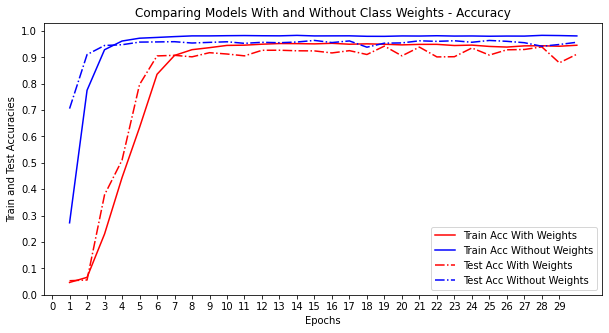

In [47]:
# define area
plt.figure(figsize=(10, 5))

# define x axis
x = final.index
  
# plot lines train acc
plt.plot(x, final['Train Acc With'], label = "Train Acc With Weights", color='red')
plt.plot(x, final['Train Acc Without'], label = "Train Acc Without Weights", color='blue')

# plot lines train loss
#plt.plot(x, final['Train Loss With'], label = "Train Loss With Weights", color='red', linestyle='-.')
#plt.plot(x, final['Train Loss Without'], label = "Train Loss Without Weights", color='blue', linestyle='-.')

# plot lines test acc
plt.plot(x, final['Test Acc With'], label = "Test Acc With Weights", color='red', linestyle='-.')
plt.plot(x, final['Test Acc Without'], label = "Test Acc Without Weights", color='blue', linestyle='-.')

plt.xticks(np.arange(0, 30, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train and Test Accuracies")
plt.title("Comparing Models With and Without Class Weights - Accuracy")
plt.show()

### Plot loss values

#### Create a df to plot loss values

In [16]:
# Initialize an empty df
final_loss = pd.DataFrame()

In [17]:
# List the columns the df will have
final_loss_columns = ['Train Loss Lower', 'Train Loss IN', 'Val Loss Lower', 'Val Loss IN']

In [18]:
# Create the columns
for column in final_loss_columns:
    final_loss[column] = None

In [19]:
# Confirm they were correctly created
final_loss

,Train Loss Lower,Train Loss IN,Val Loss Lower,Val Loss IN


In [20]:
# Add training accuracy values
final_loss['Train Loss Lower'] = lower['loss']
final_loss['Train Loss IN'] = i_norma['loss']

# Add val accuracy values
final_loss['Val Loss Lower'] = lower['val_loss']
final_loss['Val Loss IN'] = i_norma['val_loss']

In [21]:
final_loss.head(5)

,Train Loss Lower,Train Loss IN,Val Loss Lower,Val Loss IN
0,3.596039,7.264599,2.627808,2.321735
1,27.346151,1.461462,29.248833,0.891036
2,114.021278,0.600379,88.799347,0.665968
3,319.421387,0.348970,239.794388,0.557698
4,629.885010,0.243041,576.906555,0.636678


#### Plot

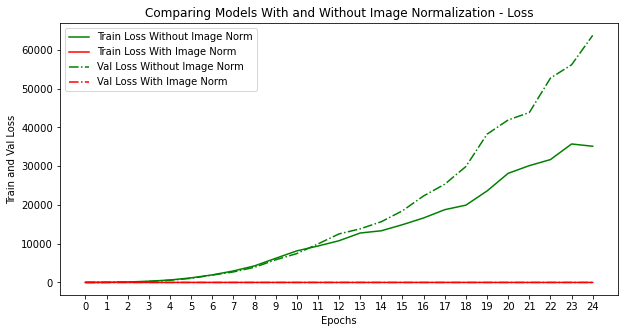

In [23]:
# define area
plt.figure(figsize=(10, 5))

# define x axis
x = final_loss.index
  
# plot lines
plt.plot(x, final_loss['Train Loss Lower'], label = "Train Loss Without Image Norm", color='green')
plt.plot(x, final_loss['Train Loss IN'], label = "Train Loss With Image Norm", color='red')

plt.plot(x, final_loss['Val Loss Lower'], label = "Val Loss Without Image Norm", color='green', linestyle='-.')
plt.plot(x, final_loss['Val Loss IN'], label = "Val Loss With Image Norm", color='red', linestyle='-.')

plt.xticks(np.arange(0, 25, 1))
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train and Val Loss")
plt.title("Comparing Models With and Without Image Normalization - Loss")
plt.show()